In [1]:
# imports 
import math
import numpy as np 
import h5py
import matplotlib.pyplot as plt 
import tensorflow as tf 

%matplotlib inline 

## Data loading and preparation

- Load the data 
- Normalize the image vector

In [2]:
# load the data from compressed file 
train_dataset = h5py.File('datasets/train_signs.h5', "r")
train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

test_dataset = h5py.File('datasets/test_signs.h5', "r")
test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

print( "train set X origin shape", train_set_x_orig.shape)
print( "train set Y origin shape", train_set_y_orig.shape)
print( "test set X origin shape", test_set_x_orig.shape)
print( "test set Y origin shape", test_set_y_orig.shape)


classes = np.array(test_dataset["list_classes"][:]) # the list of classes

# Normalize these vectors 
X_train = train_set_x_orig/255
X_test = test_set_x_orig/255

Y_train = train_set_y_orig
Y_test = test_set_y_orig


train set X origin shape (1080, 64, 64, 3)
train set Y origin shape (1080,)
test set X origin shape (120, 64, 64, 3)
test set Y origin shape (120,)


# Convolutional Neural network model 

* Here we only want to see how the neural network model works on sign MNIST dataset. 


In [3]:
# making a sequential model with Tensorflow 
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu',padding='same', input_shape=(64,64,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

# comile the model 
model.compile(optimizer='adam', 
             loss = "sparse_categorical_crossentropy",
             metrics= ["accuracy"])

# model summary
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 7200)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               3686912   
_________________________________________________________________
dense_1 (Dense)              (None, 128)               6

In [4]:
# fit the model 
history = model.fit(X_train, Y_train, epochs = 20, batch_size=32, verbose=2)

# model evaluation
model.evaluate(X_test, Y_test)

Epoch 1/20
34/34 - 2s - loss: 1.7703 - accuracy: 0.2537
Epoch 2/20
34/34 - 2s - loss: 1.1824 - accuracy: 0.5667
Epoch 3/20
34/34 - 2s - loss: 0.6596 - accuracy: 0.7870
Epoch 4/20
34/34 - 2s - loss: 0.4511 - accuracy: 0.8509
Epoch 5/20
34/34 - 2s - loss: 0.3069 - accuracy: 0.9130
Epoch 6/20
34/34 - 2s - loss: 0.1922 - accuracy: 0.9398
Epoch 7/20
34/34 - 2s - loss: 0.1253 - accuracy: 0.9630
Epoch 8/20
34/34 - 2s - loss: 0.0813 - accuracy: 0.9778
Epoch 9/20
34/34 - 2s - loss: 0.0371 - accuracy: 0.9944
Epoch 10/20
34/34 - 2s - loss: 0.0200 - accuracy: 0.9963
Epoch 11/20
34/34 - 2s - loss: 0.0165 - accuracy: 0.9991
Epoch 12/20
34/34 - 2s - loss: 0.0203 - accuracy: 0.9972
Epoch 13/20
34/34 - 2s - loss: 0.0092 - accuracy: 0.9991
Epoch 14/20
34/34 - 2s - loss: 0.0108 - accuracy: 0.9991
Epoch 15/20
34/34 - 2s - loss: 0.0049 - accuracy: 1.0000
Epoch 16/20
34/34 - 2s - loss: 0.0023 - accuracy: 1.0000
Epoch 17/20
34/34 - 2s - loss: 0.0015 - accuracy: 1.0000
Epoch 18/20
34/34 - 2s - loss: 0.0012 - 

[0.20877835154533386, 0.9583333134651184]

<Figure size 432x288 with 0 Axes>

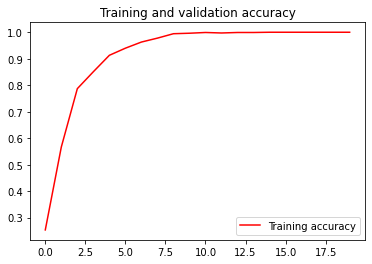

<Figure size 432x288 with 0 Axes>

In [5]:
# Plot the chart for accuracy and loss on both training and validation
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
# plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

# Conclusion

* with just 2 layers of convolutions, the model became very stable, and the fluctuation in accuracy that was observed with only neural network is not there anymore.
* For neural network model, it took more than 40 epochs to reach a level of 97% train accuracy, but with CNN ( with two layers of convolution) the model reaches 100 percent train accuracy on 11th epoch with (512, 256, 128, 6) dimension of dense layer and with test accuracy of 95 percent.
* (BEST MODEL) The same model with dense layers of 512, 128,6 neurons, reaches 100% accuracy on train data in 13/20 epoch with test accuracy of 95.85%, so reducing neurons actually improved the model. 
* The same model with 256, 128 and 6 neuron dense layer after two convolution layers, reaches 100% accuracy in 13th epoch but this time the test accuracy drops to 94 %.
* Since the test accuracy has dropped, next i will try to overfit the model and then use drop out to gain on test accuracy. I am uisng only one layer of drop out, which is placed after 512 neurons dense layer. The model reached 97 % accuracy in 20 epochs, with 90 % test accuraccy, it seems the regularization was much stronger than what i intended it to be. I believe some information was lost due to dropout.
* new model (512, 512, 128, 6) with dropout layer between two 512 layer, train accuracy remians 97% and test accuracy 85 %. Drop out doesn't seems to have positive impact for this model, may the model is not overfitting at all. This might be because of the fact that the data I am using is processed data and only a subset of original sign MNIST data.